# Modules

In [1]:
import json
from glob import glob
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from proj.conf import methods
from proj.promptfoo import read_results

# Settings

These settings depend on the manuscript section

In [2]:
# TEST_TYPES = [
#     "Formatting",
#     "Information accuracy / Math",
#     "Information accuracy / Citations",
# ]

# Get list of outputs for each model

In [3]:
INPUT_DIR = methods.CASES / "phenoplier" / "outputs"
assert INPUT_DIR.exists
display(INPUT_DIR)

PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs')

In [4]:
INPUT_MODELS = sorted(list(INPUT_DIR.glob("*")))

In [5]:
INPUT_MODELS

[PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/claude-3-haiku-20240307'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/claude-3-opus-20240229'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/claude-3-sonnet-20240229'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/gemma-2b-instruct-fp16'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/gpt-3.5-turbo-0125'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/gpt-4-0613'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/gpt-4-turbo-2024-04-09'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/

# Read all results

In [6]:
results = []
for model in INPUT_MODELS:
    print(model, flush=True)
    model_results = read_results(model)
    results.append(model_results)

/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/claude-3-haiku-20240307
/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/claude-3-opus-20240229
/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/claude-3-sonnet-20240229
/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/gemma-2b-instruct-fp16
/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/gpt-3.5-turbo-0125
/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/gpt-4-0613
/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/gpt-4-turbo-2024-04-09
/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/methods/cases/phenoplier/outputs/llama2-7b-chat-fp16
/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/m

In [7]:
len(results)

16

In [8]:
results = pd.concat(results, ignore_index=True)

In [9]:
results.shape

(8136, 10)

In [10]:
results.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Ends with a period,Formatting
2,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Is a multiblock paragraph,Formatting
3,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [11]:
results["model"].value_counts()

model
claude-3-haiku-20240307             510
claude-3-opus-20240229              510
claude-3-sonnet-20240229            510
gemma-2b-instruct-fp16              510
gpt-3.5-turbo-0125                  510
gpt-4-0613                          510
gpt-4-turbo-2024-04-09              510
llama2-7b-chat-fp16                 510
llama3-70b-instruct-q5_1            510
llama3-8b-instruct-fp16             510
mistral-7b-instruct-fp16            510
mistral-7b-instruct-v0.2-fp16       510
mixtral-8x7b-instruct-v0.1-q8_0     510
starling-lm-7b-alpha-fp16           510
starling-lm-7b-beta-fp16            510
mixtral-8x22b-instruct-v0.1-q5_1    486
Name: count, dtype: int64

In [12]:
results["prompt"].value_counts()

prompt
baseline                   2720
candidate_with_metadata    2712
candidate                  2704
Name: count, dtype: int64

In [13]:
results["test_description"].value_counts()

test_description
Preserves numbered equations and references to articles    2400
Preserves inline math                                      1920
Fixes wrong latex expressions                              1912
Fixes incorrect math references                            1904
Name: count, dtype: int64

In [15]:
_tmp = results["comp_type"].value_counts()
display(_tmp)

TEST_TYPES = sorted(_tmp.index)
display(TEST_TYPES)

comp_type
Formatting                          6699
Information accuracy / Math          957
Information accuracy / Citations     480
Name: count, dtype: int64

['Formatting',
 'Information accuracy / Citations',
 'Information accuracy / Math']

In [16]:
results["comp_desc"].value_counts()

comp_desc
Starts with capital letter                                     957
Ends with a period                                             957
Is a multiblock paragraph                                      957
Doesn't include manuscript title                               957
Doesn't reference authors, keywords, abstract, etc             957
Doesn't say what is doing                                      957
Has roughly the same length as input                           957
Preserves inline math                                          240
Preserves numbered equations                                   240
Keeps most references to other articles                        240
Does not make up references to other articles                  240
Fixes wrong latex expressions                                  239
Fixes wrong references to math symbols in defined equations    238
Name: count, dtype: int64

# Pass rate

## Stats

In [17]:
df = results.copy()

In [18]:
df.shape

(8136, 10)

In [19]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Ends with a period,Formatting
2,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Is a multiblock paragraph,Formatting
3,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [20]:
df["prompt"].value_counts()

prompt
baseline                   2720
candidate_with_metadata    2712
candidate                  2704
Name: count, dtype: int64

In [21]:
df["test_description"].value_counts()

test_description
Preserves numbered equations and references to articles    2400
Preserves inline math                                      1920
Fixes wrong latex expressions                              1912
Fixes incorrect math references                            1904
Name: count, dtype: int64

In [22]:
df["comp_type"].value_counts()

comp_type
Formatting                          6699
Information accuracy / Math          957
Information accuracy / Citations     480
Name: count, dtype: int64

## Test level

### Sum and normalize `passed` by model and prompt

**Description:** This statistic computed below, based on the `passed` column, measures if the test (by model and prompt) as a whole passed or failed, which is computed by promptfoo.
The test passes if all the assertions in it pass, so it's a stringent criteria.

In [23]:
passed_unique = results.groupby(["model", "prompt"])["passed"].count()

In [24]:
assert passed_unique.unique().shape[0] == 1

# THE ERROR HERE IS BECAUSE mixtral-8x22b did not produce some outputs in some cases (it should be run again)

AssertionError: 

In [33]:
n_tests_per_group = float(passed_unique.unique()[0])
display(n_tests_per_group)

170.0

In [34]:
df = results.groupby(["model", "prompt"])["passed"].sum().to_frame().reset_index()

In [35]:
df.head()

,model,prompt,passed
0,claude-3-haiku-20240307,baseline,32
1,claude-3-haiku-20240307,candidate,16
2,claude-3-haiku-20240307,candidate_with_metadata,0
3,claude-3-opus-20240229,baseline,44
4,claude-3-opus-20240229,candidate,130


In [36]:
df = df.assign(pass_rate=lambda x: x["passed"] / n_tests_per_group)

In [37]:
df.shape

(48, 4)

In [38]:
df.head()

,model,prompt,passed,pass_rate
0,claude-3-haiku-20240307,baseline,32,0.188235
1,claude-3-haiku-20240307,candidate,16,0.094118
2,claude-3-haiku-20240307,candidate_with_metadata,0,0.000000
3,claude-3-opus-20240229,baseline,44,0.258824
4,claude-3-opus-20240229,candidate,130,0.764706


In [39]:
df.sort_values("pass_rate")

,model,prompt,passed,pass_rate
23,llama2-7b-chat-fp16,candidate_with_metadata,0,0.000000
26,llama3-70b-instruct-q5_1,candidate_with_metadata,0,0.000000
27,llama3-8b-instruct-fp16,baseline,0,0.000000
28,llama3-8b-instruct-fp16,candidate,0,0.000000
29,llama3-8b-instruct-fp16,candidate_with_metadata,0,0.000000
21,llama2-7b-chat-fp16,baseline,0,0.000000
10,gemma-2b-instruct-fp16,candidate,0,0.000000
9,gemma-2b-instruct-fp16,baseline,0,0.000000
11,gemma-2b-instruct-fp16,candidate_with_metadata,0,0.000000
39,mixtral-8x7b-instruct-v0.1-q8_0,baseline,0,0.000000


In [40]:
_df_stats = df["pass_rate"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    48.000000
mean      0.238725
std       0.266050
min       0.000000
25%       0.000000
50%       0.129412
75%       0.320588
max       0.905882
Name: pass_rate, dtype: float64

### Plot by prompt

In [41]:
# sort models by comp_score in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate", "candidate_with_metadata"))]
    .groupby("model")["pass_rate"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [42]:
sorted_models[-5:]

['starling-lm-7b-alpha-fp16',
 'gpt-4-0613',
 'claude-3-sonnet-20240229',
 'claude-3-opus-20240229',
 'gpt-4-turbo-2024-04-09']

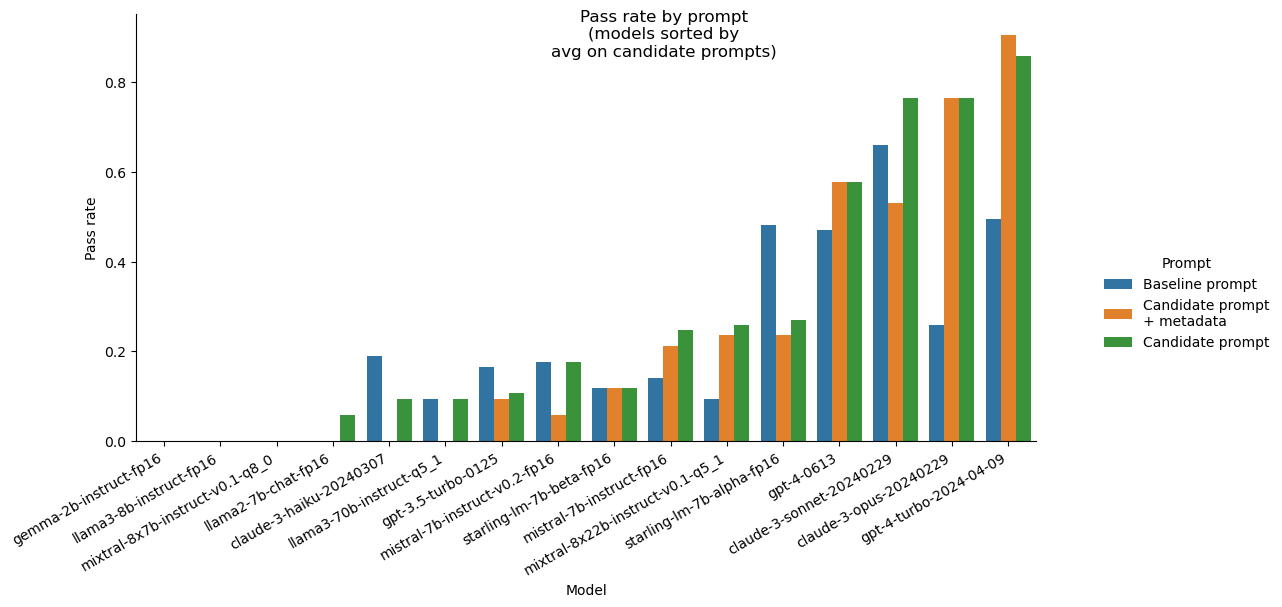

In [43]:
g = sns.catplot(
    data=df,
    x="model",
    y="pass_rate",
    hue="prompt",
    hue_order=["baseline", "candidate_with_metadata", "candidate"],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.fig.suptitle("Pass rate by prompt\n(models sorted by\navg on candidate prompts)")
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Pass rate")

g._legend.set_title("Prompt")
new_labels = ["Baseline prompt", "Candidate prompt\n+ metadata", "Candidate prompt"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

In [44]:
# this list is to check whether results match with those shown in the promptfoo's web interface
df.groupby(["model", "prompt"])["pass_rate"].mean()

model                             prompt                 
claude-3-haiku-20240307           baseline                   0.188235
                                  candidate                  0.094118
                                  candidate_with_metadata    0.000000
claude-3-opus-20240229            baseline                   0.258824
                                  candidate                  0.764706
                                  candidate_with_metadata    0.764706
claude-3-sonnet-20240229          baseline                   0.658824
                                  candidate                  0.764706
                                  candidate_with_metadata    0.529412
gemma-2b-instruct-fp16            baseline                   0.000000
                                  candidate                  0.000000
                                  candidate_with_metadata    0.000000
gpt-3.5-turbo-0125                baseline                   0.164706
                                

## Assertion level

### Sum and normalize `comp_pass` by model

**Description:** This statistic computed below, based on the `comp_pass` column, measures if the assertion (by model and prompt) inside each test passed or failed, which is computed by promptfoo.
The previous plot used the `passed` column, with is by test, but this is is by assertions (which belong to a single test).

In [46]:
passed_unique = results.groupby(["model", "prompt"])["comp_pass"].count()
display(passed_unique.head())

model                    prompt                 
claude-3-haiku-20240307  baseline                   170
                         candidate                  170
                         candidate_with_metadata    170
claude-3-opus-20240229   baseline                   170
                         candidate                  170
Name: comp_pass, dtype: int64

In [47]:
assert passed_unique.unique().shape[0] == 1

AssertionError: 

In [48]:
n_tests_per_group = passed_unique.unique()[0]
display(n_tests_per_group)

170

**THIS NEEDS UPDATING** Understanding the above numbers:
* 145 = 7 * 5 + 8 * 5 + 7 * 5 + 7 * 5 = 145

In [49]:
df = results.groupby(["model", "prompt"])["comp_pass"].sum().to_frame().reset_index()

In [50]:
df.head()

,model,prompt,comp_pass
0,claude-3-haiku-20240307,baseline,148
1,claude-3-haiku-20240307,candidate,142
2,claude-3-haiku-20240307,candidate_with_metadata,137
3,claude-3-opus-20240229,baseline,145
4,claude-3-opus-20240229,candidate,165


In [51]:
# for testing purposes
df[df["model"].str.contains("mixtral-8x22")]

,model,prompt,comp_pass
36,mixtral-8x22b-instruct-v0.1-q5_1,baseline,141
37,mixtral-8x22b-instruct-v0.1-q5_1,candidate,140
38,mixtral-8x22b-instruct-v0.1-q5_1,candidate_with_metadata,144


In [52]:
df = df.assign(pass_rate=df.apply(lambda x: x["comp_pass"] / n_tests_per_group, axis=1))

In [53]:
df.shape

(48, 4)

In [54]:
df.head()

,model,prompt,comp_pass,pass_rate
0,claude-3-haiku-20240307,baseline,148,0.870588
1,claude-3-haiku-20240307,candidate,142,0.835294
2,claude-3-haiku-20240307,candidate_with_metadata,137,0.805882
3,claude-3-opus-20240229,baseline,145,0.852941
4,claude-3-opus-20240229,candidate,165,0.970588


In [55]:
df.sort_values("pass_rate")

,model,prompt,comp_pass,pass_rate
27,llama3-8b-instruct-fp16,baseline,112,0.658824
24,llama3-70b-instruct-q5_1,baseline,115,0.676471
11,gemma-2b-instruct-fp16,candidate_with_metadata,115,0.676471
28,llama3-8b-instruct-fp16,candidate,116,0.682353
29,llama3-8b-instruct-fp16,candidate_with_metadata,116,0.682353
23,llama2-7b-chat-fp16,candidate_with_metadata,118,0.694118
10,gemma-2b-instruct-fp16,candidate,122,0.717647
22,llama2-7b-chat-fp16,candidate,123,0.723529
9,gemma-2b-instruct-fp16,baseline,125,0.735294
26,llama3-70b-instruct-q5_1,candidate_with_metadata,127,0.747059


In [56]:
_df_stats = df["pass_rate"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    48.000000
mean      0.837868
std       0.093213
min       0.658824
25%       0.764706
50%       0.841176
75%       0.900000
max       0.988235
Name: pass_rate, dtype: float64

### Plot by prompt

In [57]:
# sort models by comp_score in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate", "candidate_with_metadata"))]
    .groupby("model")["pass_rate"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [58]:
sorted_models[-5:]

['mistral-7b-instruct-fp16',
 'gpt-4-0613',
 'claude-3-sonnet-20240229',
 'claude-3-opus-20240229',
 'gpt-4-turbo-2024-04-09']

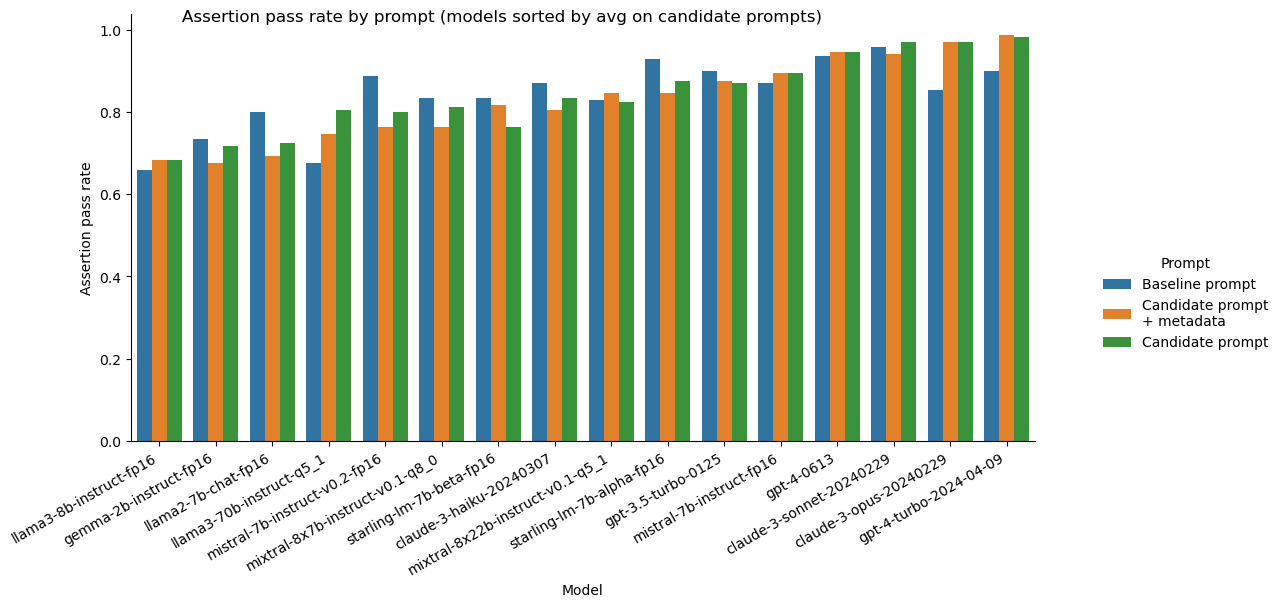

In [59]:
g = sns.catplot(
    data=df,
    x="model",
    y="pass_rate",
    hue="prompt",
    hue_order=["baseline", "candidate_with_metadata", "candidate"],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.fig.suptitle(
    "Assertion pass rate by prompt (models sorted by avg on candidate prompts)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion pass rate")

g._legend.set_title("Prompt")
new_labels = ["Baseline prompt", "Candidate prompt\n+ metadata", "Candidate prompt"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

In [60]:
# this list is to check whether results match with those shown in the promptfoo's web interface
df.groupby(["model", "prompt"])["pass_rate"].mean()

model                             prompt                 
claude-3-haiku-20240307           baseline                   0.870588
                                  candidate                  0.835294
                                  candidate_with_metadata    0.805882
claude-3-opus-20240229            baseline                   0.852941
                                  candidate                  0.970588
                                  candidate_with_metadata    0.970588
claude-3-sonnet-20240229          baseline                   0.958824
                                  candidate                  0.970588
                                  candidate_with_metadata    0.941176
gemma-2b-instruct-fp16            baseline                   0.735294
                                  candidate                  0.717647
                                  candidate_with_metadata    0.676471
gpt-3.5-turbo-0125                baseline                   0.900000
                                

### Sum and normalize `comp_pass` by model and assertion type

**Description:** This statistic computed below, based on the `comp_pass` column, measures if the assertion (by model, prompt and assertion type/`comp_type`) inside each test passed or failed, which is computed by promptfoo.
The test the assertion belongs to fails if a single assertion in it fails.

In [61]:
passed_unique = results.groupby(["model", "prompt", "comp_type"])["comp_pass"].count()
display(passed_unique)
assert passed_unique.unique().shape[0] == (len(TEST_TYPES) - 1)

model                     prompt                   comp_type                       
claude-3-haiku-20240307   baseline                 Formatting                          140
                                                   Information accuracy / Citations     10
                                                   Information accuracy / Math          20
                          candidate                Formatting                          140
                                                   Information accuracy / Citations     10
                                                                                      ... 
starling-lm-7b-beta-fp16  candidate                Information accuracy / Citations     10
                                                   Information accuracy / Math          20
                          candidate_with_metadata  Formatting                          140
                                                   Information accuracy / Citations     10
      

AssertionError: 

In [62]:
n_tests_per_group = passed_unique.loc[
    passed_unique.index[0][0], passed_unique.index[0][1]
]
display(n_tests_per_group)

comp_type
Formatting                          140
Information accuracy / Citations     10
Information accuracy / Math          20
Name: comp_pass, dtype: int64

**TODO:** update

Understanding the above numbers:
* Formatting: 120 -> 6 per test * 4 test descriptions * 5 repetitions = 120
* Information accuracy: 10 -> 6 per test * 4 test descriptions * 5 repetitions = 120
* Spelling/grammar: 5 -> 2 per test * 1 test descriptions * 5 repetitions = 10
* Structure: 10 -> 1 per test * 2 test descriptions * 5 repetitions = 10

In [63]:
df = (
    results.groupby(["model", "prompt", "comp_type"])["comp_pass"]
    .sum()
    .to_frame()
    .reset_index()
)

In [64]:
df.head()

,model,prompt,comp_type,comp_pass
0,claude-3-haiku-20240307,baseline,Formatting,124
1,claude-3-haiku-20240307,baseline,Information accuracy / Citations,10
2,claude-3-haiku-20240307,baseline,Information accuracy / Math,14
3,claude-3-haiku-20240307,candidate,Formatting,119
4,claude-3-haiku-20240307,candidate,Information accuracy / Citations,10


In [65]:
# for testing purposes
df[df["model"].str.contains("opus")]

,model,prompt,comp_type,comp_pass
9,claude-3-opus-20240229,baseline,Formatting,120
10,claude-3-opus-20240229,baseline,Information accuracy / Citations,10
11,claude-3-opus-20240229,baseline,Information accuracy / Math,15
12,claude-3-opus-20240229,candidate,Formatting,140
13,claude-3-opus-20240229,candidate,Information accuracy / Citations,10
14,claude-3-opus-20240229,candidate,Information accuracy / Math,15
15,claude-3-opus-20240229,candidate_with_metadata,Formatting,140
16,claude-3-opus-20240229,candidate_with_metadata,Information accuracy / Citations,10
17,claude-3-opus-20240229,candidate_with_metadata,Information accuracy / Math,15


In [66]:
df.apply(lambda x: x["comp_pass"] / n_tests_per_group[x["comp_type"]], axis=1)

0      0.885714
1      1.000000
2      0.700000
3      0.850000
4      1.000000
         ...   
139    1.000000
140    0.350000
141    0.850000
142    1.000000
143    0.500000
Length: 144, dtype: float64

In [67]:
df = df.assign(
    pass_rate=df.apply(
        lambda x: x["comp_pass"] / n_tests_per_group[x["comp_type"]], axis=1
    )
)

In [68]:
df.shape

(144, 5)

In [69]:
df.head()

,model,prompt,comp_type,comp_pass,pass_rate
0,claude-3-haiku-20240307,baseline,Formatting,124,0.885714
1,claude-3-haiku-20240307,baseline,Information accuracy / Citations,10,1.000000
2,claude-3-haiku-20240307,baseline,Information accuracy / Math,14,0.700000
3,claude-3-haiku-20240307,candidate,Formatting,119,0.850000
4,claude-3-haiku-20240307,candidate,Information accuracy / Citations,10,1.000000


In [70]:
df.sort_values("pass_rate")

,model,prompt,comp_type,comp_pass,pass_rate
32,gemma-2b-instruct-fp16,candidate,Information accuracy / Math,0,0.00
65,llama2-7b-chat-fp16,baseline,Information accuracy / Math,0,0.00
35,gemma-2b-instruct-fp16,candidate_with_metadata,Information accuracy / Math,1,0.05
119,mixtral-8x7b-instruct-v0.1-q8_0,baseline,Information accuracy / Math,1,0.05
29,gemma-2b-instruct-fp16,baseline,Information accuracy / Math,2,0.10
...,...,...,...,...,...
51,gpt-4-0613,candidate_with_metadata,Formatting,140,1.00
10,claude-3-opus-20240229,baseline,Information accuracy / Citations,10,1.00
79,llama3-70b-instruct-q5_1,candidate_with_metadata,Information accuracy / Citations,10,1.00
45,gpt-4-0613,baseline,Formatting,140,1.00


In [71]:
_df_stats = df["pass_rate"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    144.000000
mean       0.713244
std        0.296514
min        0.000000
25%        0.500000
50%        0.807143
75%        1.000000
max        1.000000
Name: pass_rate, dtype: float64

### Plot by assertion type on `candidate` prompt

In [72]:
# sort models by comp_score in candidate prompt only (which is the best performing one in most models)
sorted_models = (
    df[df["prompt"].isin(("candidate",))]
    .groupby(["model", "comp_type"])["pass_rate"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [73]:
sorted_models[-5:]

['claude-3-haiku-20240307',
 'gpt-4-0613',
 'claude-3-opus-20240229',
 'claude-3-sonnet-20240229',
 'gpt-4-turbo-2024-04-09']

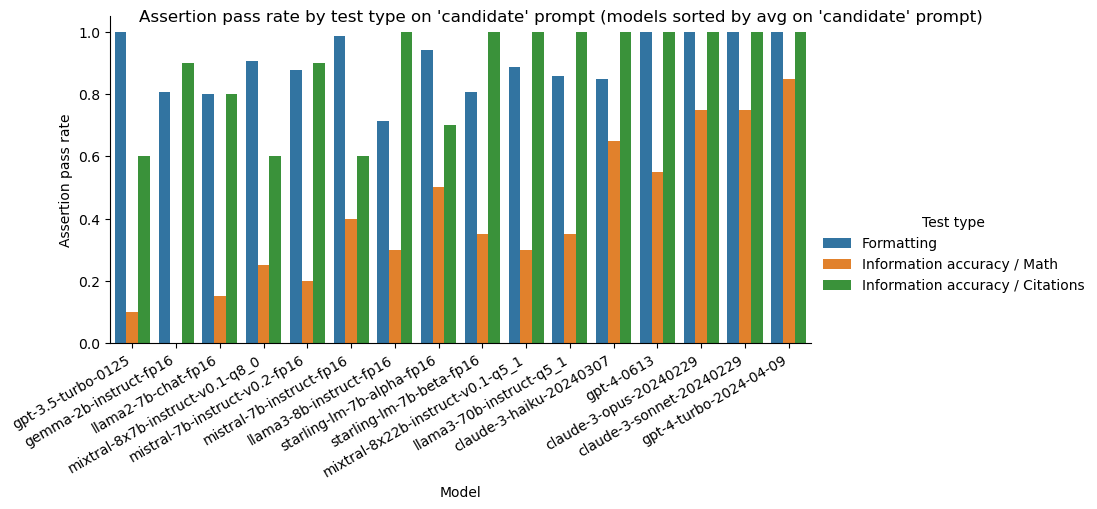

In [76]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    # data=df,
    # col="prompt",
    # col_wrap=1,
    x="model",
    y="pass_rate",
    hue="comp_type",
    hue_order=[
        "Formatting",
        "Information accuracy / Math",
        "Information accuracy / Citations",
    ],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.fig.suptitle(
    "Assertion pass rate by test type on 'candidate' prompt (models sorted by avg on 'candidate' prompt)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion pass rate")

g._legend.set_title("Test type")
# new_labels = [
#     "Spelling/grammar",
#     "Formatting",
#     "Structure\n(C-C-C)",
# ]
# for t, l in zip(g._legend.texts, new_labels):
#     t.set_text(l)

In [77]:
# for testing:
_tmp = (
    df[df["prompt"] == "candidate"].groupby(["model", "comp_type"])["pass_rate"].mean()
)

In [78]:
_tmp.index.get_level_values(0).unique()

Index(['claude-3-haiku-20240307', 'claude-3-opus-20240229',
       'claude-3-sonnet-20240229', 'gemma-2b-instruct-fp16',
       'gpt-3.5-turbo-0125', 'gpt-4-0613', 'gpt-4-turbo-2024-04-09',
       'llama2-7b-chat-fp16', 'llama3-70b-instruct-q5_1',
       'llama3-8b-instruct-fp16', 'mistral-7b-instruct-fp16',
       'mistral-7b-instruct-v0.2-fp16', 'mixtral-8x22b-instruct-v0.1-q5_1',
       'mixtral-8x7b-instruct-v0.1-q8_0', 'starling-lm-7b-alpha-fp16',
       'starling-lm-7b-beta-fp16'],
      dtype='object', name='model')

In [79]:
_tmp.loc["starling-lm-7b-alpha-fp16"]

comp_type
Formatting                          0.942857
Information accuracy / Citations    0.700000
Information accuracy / Math         0.500000
Name: pass_rate, dtype: float64

### Sum and normalize `comp_pass` by model and assertion

**TODO**: agregate Formatting assertions? Otherwise, the plot is too cluttered.

In [84]:
passed_unique = results.groupby(["model", "prompt", "comp_desc"])["comp_pass"].count()
display(passed_unique)
assert passed_unique.unique().shape[0] == 2

model                     prompt                   comp_desc                                         
claude-3-haiku-20240307   baseline                 Does not make up references to other articles          5
                                                   Doesn't include manuscript title                      20
                                                   Doesn't reference authors, keywords, abstract, etc    20
                                                   Doesn't say what is doing                             20
                                                   Ends with a period                                    20
                                                                                                         ..
starling-lm-7b-beta-fp16  candidate_with_metadata  Is a multiblock paragraph                             20
                                                   Keeps most references to other articles                5
                                  

AssertionError: 

In [85]:
n_tests_per_group = passed_unique.loc[
    passed_unique.index[0][0], passed_unique.index[0][1]
]
display(n_tests_per_group)

comp_desc
Does not make up references to other articles                   5
Doesn't include manuscript title                               20
Doesn't reference authors, keywords, abstract, etc             20
Doesn't say what is doing                                      20
Ends with a period                                             20
Fixes wrong latex expressions                                   5
Fixes wrong references to math symbols in defined equations     5
Has roughly the same length as input                           20
Is a multiblock paragraph                                      20
Keeps most references to other articles                         5
Preserves inline math                                           5
Preserves numbered equations                                    5
Starts with capital letter                                     20
Name: comp_pass, dtype: int64

Understanding the above numbers:
* 5 -> 1 per test * 1 test descriptions * 5 repetitions = 5
* 20 -> 1 per test * 4 test descriptions * 5 repetitions = 20

In [86]:
df = (
    results.groupby(["model", "prompt", "comp_desc"])["comp_pass"]
    .sum()
    .to_frame()
    .reset_index()
)

In [87]:
df.head()

,model,prompt,comp_desc,comp_pass
0,claude-3-haiku-20240307,baseline,Does not make up references to other articles,5
1,claude-3-haiku-20240307,baseline,Doesn't include manuscript title,20
2,claude-3-haiku-20240307,baseline,"Doesn't reference authors, keywords, abstract,...",20
3,claude-3-haiku-20240307,baseline,Doesn't say what is doing,5
4,claude-3-haiku-20240307,baseline,Ends with a period,20


In [88]:
# for testing purposes
df[df["model"].str.contains("opus")]

,model,prompt,comp_desc,comp_pass
39,claude-3-opus-20240229,baseline,Does not make up references to other articles,5
40,claude-3-opus-20240229,baseline,Doesn't include manuscript title,20
41,claude-3-opus-20240229,baseline,"Doesn't reference authors, keywords, abstract,...",20
42,claude-3-opus-20240229,baseline,Doesn't say what is doing,5
43,claude-3-opus-20240229,baseline,Ends with a period,20
44,claude-3-opus-20240229,baseline,Fixes wrong latex expressions,0
45,claude-3-opus-20240229,baseline,Fixes wrong references to math symbols in defi...,5
46,claude-3-opus-20240229,baseline,Has roughly the same length as input,20
47,claude-3-opus-20240229,baseline,Is a multiblock paragraph,15
48,claude-3-opus-20240229,baseline,Keeps most references to other articles,5


In [89]:
df.apply(lambda x: x["comp_pass"] / n_tests_per_group[x["comp_desc"]], axis=1)

0      1.00
1      1.00
2      1.00
3      0.25
4      1.00
       ... 
619    0.75
620    1.00
621    1.00
622    1.00
623    0.75
Length: 624, dtype: float64

In [90]:
df = df.assign(
    pass_rate=df.apply(
        lambda x: x["comp_pass"] / n_tests_per_group[x["comp_desc"]], axis=1
    )
)

In [91]:
df.shape

(624, 5)

In [92]:
df.head()

,model,prompt,comp_desc,comp_pass,pass_rate
0,claude-3-haiku-20240307,baseline,Does not make up references to other articles,5,1.00
1,claude-3-haiku-20240307,baseline,Doesn't include manuscript title,20,1.00
2,claude-3-haiku-20240307,baseline,"Doesn't reference authors, keywords, abstract,...",20,1.00
3,claude-3-haiku-20240307,baseline,Doesn't say what is doing,5,0.25
4,claude-3-haiku-20240307,baseline,Ends with a period,20,1.00


In [93]:
df.sort_values("pass_rate")

,model,prompt,comp_desc,comp_pass,pass_rate
551,starling-lm-7b-alpha-fp16,baseline,Fixes wrong latex expressions,0,0.0
448,mistral-7b-instruct-v0.2-fp16,candidate,Fixes wrong references to math symbols in defi...,0,0.0
447,mistral-7b-instruct-v0.2-fp16,candidate,Fixes wrong latex expressions,0,0.0
123,gemma-2b-instruct-fp16,baseline,Fixes wrong references to math symbols in defi...,0,0.0
122,gemma-2b-instruct-fp16,baseline,Fixes wrong latex expressions,0,0.0
...,...,...,...,...,...
218,gpt-4-0613,candidate,Preserves inline math,5,1.0
217,gpt-4-0613,candidate,Keeps most references to other articles,5,1.0
216,gpt-4-0613,candidate,Is a multiblock paragraph,20,1.0
230,gpt-4-0613,candidate_with_metadata,Keeps most references to other articles,5,1.0


In [94]:
_df_stats = df["pass_rate"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    624.000000
mean       0.735577
std        0.381505
min        0.000000
25%        0.600000
50%        1.000000
75%        1.000000
max        1.000000
Name: pass_rate, dtype: float64

### Plot by assertion on `candidate` prompt

In [95]:
# sort models by comp_score in candidate prompt only (which is the best performing one in most models)
sorted_models = (
    df[df["prompt"].isin(("candidate",))]
    .groupby(["model", "comp_desc"])["pass_rate"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [96]:
sorted_models[-5:]

['claude-3-haiku-20240307',
 'gpt-4-0613',
 'claude-3-opus-20240229',
 'claude-3-sonnet-20240229',
 'gpt-4-turbo-2024-04-09']

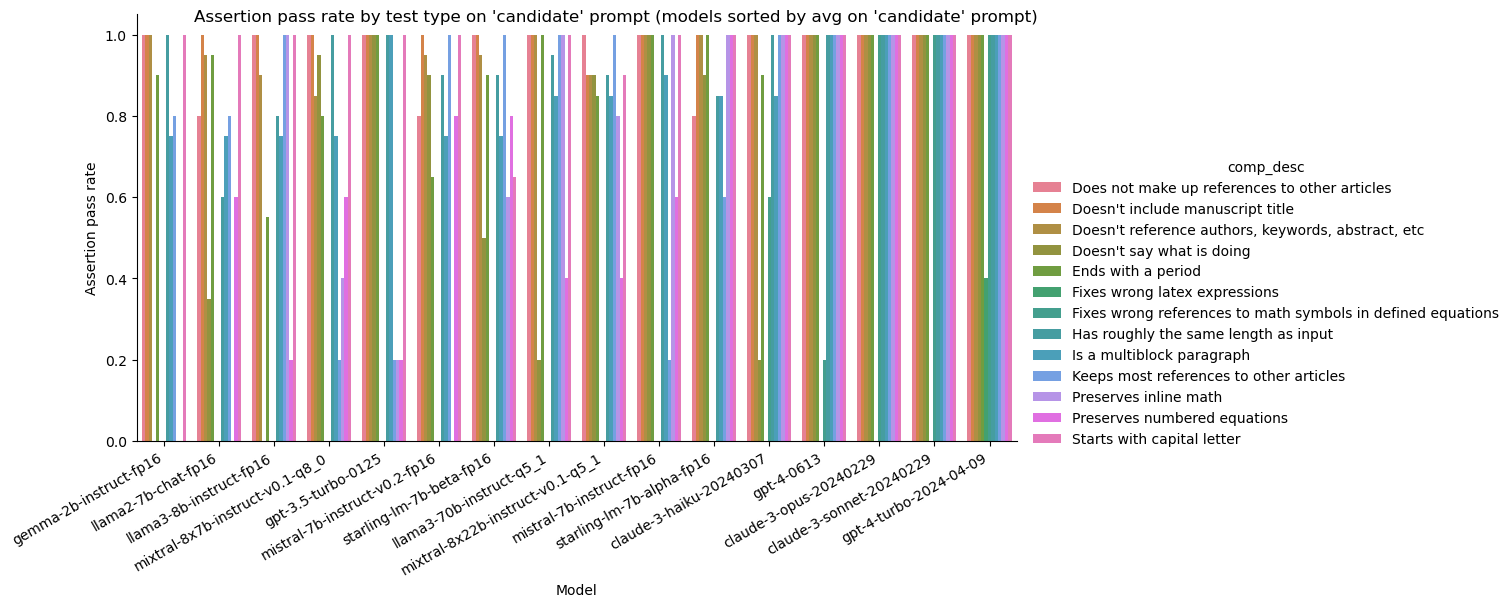

In [97]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    # data=df,
    # col="prompt",
    # col_wrap=1,
    x="model",
    y="pass_rate",
    hue="comp_desc",
    # hue_order=[
    #     "Spelling/grammar",
    #     "Formatting",
    #     "Structure",
    # ],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    height=5,
    aspect=2,
    legend_out=True,
)
g.fig.suptitle(
    "Assertion pass rate by test type on 'candidate' prompt (models sorted by avg on 'candidate' prompt)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion pass rate")

# g._legend.set_title("Test type")
# new_labels = [
#     "Spelling/grammar",
#     "Formatting",
#     "Structure\n(C-C-C)",
# ]
# for t, l in zip(g._legend.texts, new_labels):
#     t.set_text(l)

# Score

## Stats

In [98]:
results["test_description"].unique()

array(['Preserves inline math',
       'Preserves numbered equations and references to articles',
       'Fixes incorrect math references', 'Fixes wrong latex expressions'],
      dtype=object)

## Test level (`score_avg`, by promptfoo)

In [99]:
# used to normalize
MAX_SCORE = {
    "Preserves inline math": ((0.25 * 7) + 2) / 8.0,
    "Preserves numbered equations and references to articles": ((0.25 * 7) + 6) / 10.0,
    "Fixes incorrect math references": ((0.25 * 7) + 2) / 8.0,
    "Fixes wrong latex expressions": ((0.25 * 7) + 2) / 8.0,
}

### Normalize `score_avg`

In [100]:
df = results.copy()

In [101]:
df.shape

(8136, 10)

In [102]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Ends with a period,Formatting
2,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Is a multiblock paragraph,Formatting
3,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [103]:
df.groupby("model")["score_avg"].mean().sort_values()

model
gemma-2b-instruct-fp16              0.335294
llama2-7b-chat-fp16                 0.343235
llama3-70b-instruct-q5_1            0.360490
mixtral-8x7b-instruct-v0.1-q8_0     0.374118
llama3-8b-instruct-fp16             0.376863
mistral-7b-instruct-fp16            0.395000
starling-lm-7b-alpha-fp16           0.426471
starling-lm-7b-beta-fp16            0.432157
gpt-3.5-turbo-0125                  0.434314
mistral-7b-instruct-v0.2-fp16       0.441863
mixtral-8x22b-instruct-v0.1-q5_1    0.455144
gpt-4-0613                          0.457843
claude-3-haiku-20240307             0.476961
gpt-4-turbo-2024-04-09              0.517647
claude-3-opus-20240229              0.519608
claude-3-sonnet-20240229            0.521176
Name: score_avg, dtype: float64

In [104]:
df.apply(lambda x: x["score_avg"] / MAX_SCORE[x["test_description"]], axis=1)

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
8131    0.333333
8132    0.333333
8133    0.333333
8134    0.333333
8135    0.333333
Length: 8136, dtype: float64

In [105]:
df = df.assign(
    score_std=df.apply(
        lambda x: x["score_avg"] / MAX_SCORE[x["test_description"]], axis=1
    )
)

In [106]:
_df_stats = df.groupby("test_description")["score_std"].describe()
display(_df_stats)

,count,mean,std,min,25%,50%,75%,max
test_description,,,,,,,,
Fixes incorrect math references,1904.0,0.636415,0.230068,0.266667,0.466667,0.600000,0.866667,1.0
Fixes wrong latex expressions,1912.0,0.574895,0.153967,0.266667,0.466667,0.533333,0.733333,1.0
Preserves inline math,1920.0,0.863889,0.153493,0.266667,0.800000,0.866667,1.000000,1.0
Preserves numbered equations and references to articles,2400.0,0.876935,0.164050,0.245161,0.741935,0.967742,1.000000,1.0


In [107]:
_df_stats = df["score_std"].describe()
display(_df_stats)
assert _df_stats["max"].max() <= 1.0

count    8136.000000
mean        0.746589
std         0.222428
min         0.245161
25%         0.533333
50%         0.737634
75%         0.967742
max         1.000000
Name: score_std, dtype: float64

AssertionError: 

In [110]:
df.groupby("model")["score_std"].mean().sort_values()

model
gemma-2b-instruct-fp16              0.569833
llama2-7b-chat-fp16                 0.599089
llama3-70b-instruct-q5_1            0.620527
llama3-8b-instruct-fp16             0.643719
mixtral-8x7b-instruct-v0.1-q8_0     0.660426
mistral-7b-instruct-fp16            0.692330
starling-lm-7b-alpha-fp16           0.727978
starling-lm-7b-beta-fp16            0.734075
mistral-7b-instruct-v0.2-fp16       0.767674
gpt-3.5-turbo-0125                  0.770744
mixtral-8x22b-instruct-v0.1-q5_1    0.778955
gpt-4-0613                          0.787881
claude-3-haiku-20240307             0.831558
claude-3-opus-20240229              0.917580
claude-3-sonnet-20240229            0.921670
gpt-4-turbo-2024-04-09              0.922901
Name: score_std, dtype: float64

### Plot by prompt

In [111]:
# sort models by score_avg in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate", "candidate_with_metadata"))]
    .groupby("model")["score_std"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [112]:
sorted_models[-5:]

['gpt-4-0613',
 'claude-3-haiku-20240307',
 'claude-3-sonnet-20240229',
 'claude-3-opus-20240229',
 'gpt-4-turbo-2024-04-09']

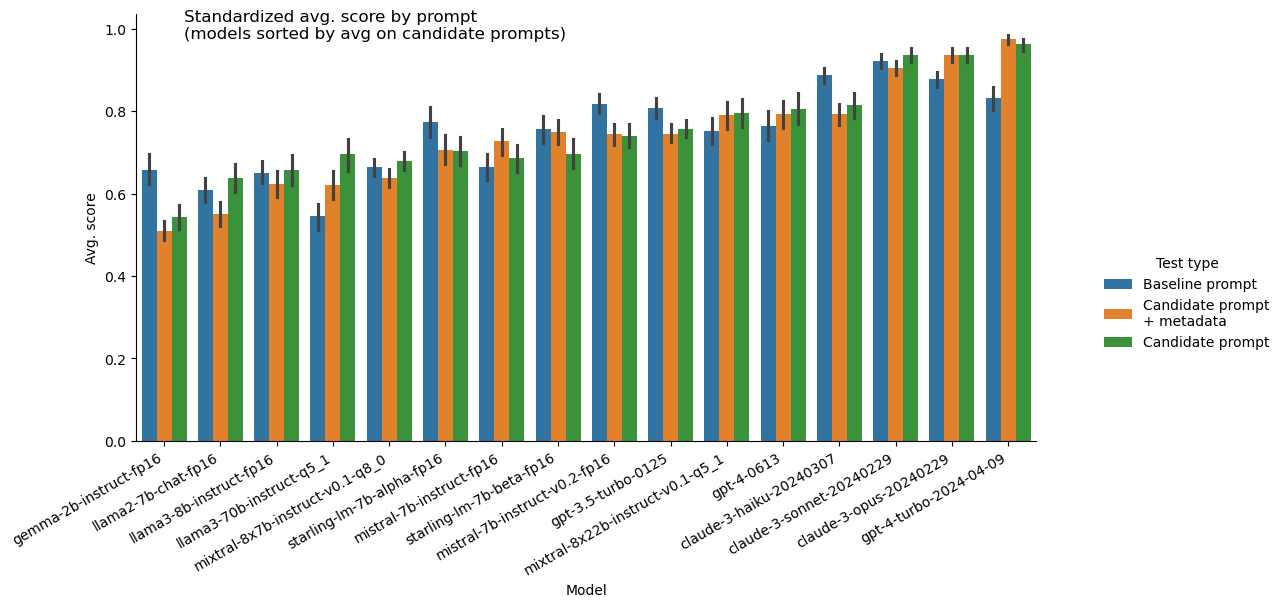

In [113]:
g = sns.catplot(
    data=df,
    x="model",
    y="score_std",
    hue="prompt",
    hue_order=["baseline", "candidate_with_metadata", "candidate"],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.fig.suptitle(
    "Standardized avg. score by prompt\n(models sorted by avg on candidate prompts)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Avg. score")

g._legend.set_title("Test type")
new_labels = ["Baseline prompt", "Candidate prompt\n+ metadata", "Candidate prompt"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

## Assertion level (`comp_score`)

### Stats

In [114]:
df = results.copy()

In [115]:
df.shape

(8136, 10)

In [116]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Ends with a period,Formatting
2,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Is a multiblock paragraph,Formatting
3,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,True,0.46875,baseline,Preserves inline math,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [117]:
df["prompt"].value_counts()

prompt
baseline                   2720
candidate_with_metadata    2712
candidate                  2704
Name: count, dtype: int64

In [118]:
df["test_description"].value_counts()

test_description
Preserves numbered equations and references to articles    2400
Preserves inline math                                      1920
Fixes wrong latex expressions                              1912
Fixes incorrect math references                            1904
Name: count, dtype: int64

In [119]:
df["comp_type"].value_counts()

comp_type
Formatting                          6699
Information accuracy / Math          957
Information accuracy / Citations     480
Name: count, dtype: int64

### Normalize `comp_score`

In [120]:
df.groupby("model")["comp_score"].mean().sort_values()

model
gemma-2b-instruct-fp16              0.335294
llama2-7b-chat-fp16                 0.343235
llama3-70b-instruct-q5_1            0.360490
mixtral-8x7b-instruct-v0.1-q8_0     0.374118
llama3-8b-instruct-fp16             0.376863
mistral-7b-instruct-fp16            0.395000
starling-lm-7b-alpha-fp16           0.426471
starling-lm-7b-beta-fp16            0.432157
gpt-3.5-turbo-0125                  0.434314
mistral-7b-instruct-v0.2-fp16       0.441863
mixtral-8x22b-instruct-v0.1-q5_1    0.455144
gpt-4-0613                          0.457843
claude-3-haiku-20240307             0.476961
gpt-4-turbo-2024-04-09              0.517647
claude-3-opus-20240229              0.519608
claude-3-sonnet-20240229            0.521176
Name: comp_score, dtype: float64

In [121]:
# Warning: this values depend on those assigned in the `promptfooconfig.yaml` file
df.loc[df["comp_type"] == "Formatting", "comp_score"] = (
    df.loc[df["comp_type"] == "Formatting", "comp_score"] / 0.25
)
df.loc[df["comp_type"] == "Information accuracy / Math", "comp_score"] = (
    df.loc[df["comp_type"] == "Information accuracy / Math", "comp_score"] / 2.0
)
df.loc[df["comp_type"] == "Information accuracy / Citations", "comp_score"] = (
    df.loc[df["comp_type"] == "Information accuracy / Citations", "comp_score"] / 2.0
)

In [122]:
df.groupby("model")["comp_score"].mean().sort_values()

model
llama3-8b-instruct-fp16             0.696275
gemma-2b-instruct-fp16              0.742402
llama3-70b-instruct-q5_1            0.761863
llama2-7b-chat-fp16                 0.777255
starling-lm-7b-beta-fp16            0.825147
mixtral-8x7b-instruct-v0.1-q8_0     0.842451
claude-3-haiku-20240307             0.854412
mistral-7b-instruct-v0.2-fp16       0.869461
starling-lm-7b-alpha-fp16           0.889216
mistral-7b-instruct-fp16            0.907794
mixtral-8x22b-instruct-v0.1-q5_1    0.909928
gpt-3.5-turbo-0125                  0.937745
claude-3-opus-20240229              0.946078
gpt-4-0613                          0.949510
gpt-4-turbo-2024-04-09              0.965686
claude-3-sonnet-20240229            0.981176
Name: comp_score, dtype: float64

In [123]:
_df_stats = df["comp_score"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    8136.000000
mean        0.865895
std         0.327272
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: comp_score, dtype: float64

### Plot by prompt

In [124]:
# sort models by comp_score in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate", "candidate_with_metadata"))]
    .groupby("model")["comp_score"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [125]:
sorted_models[-5:]

['mixtral-8x22b-instruct-v0.1-q5_1',
 'gpt-4-0613',
 'claude-3-sonnet-20240229',
 'claude-3-opus-20240229',
 'gpt-4-turbo-2024-04-09']

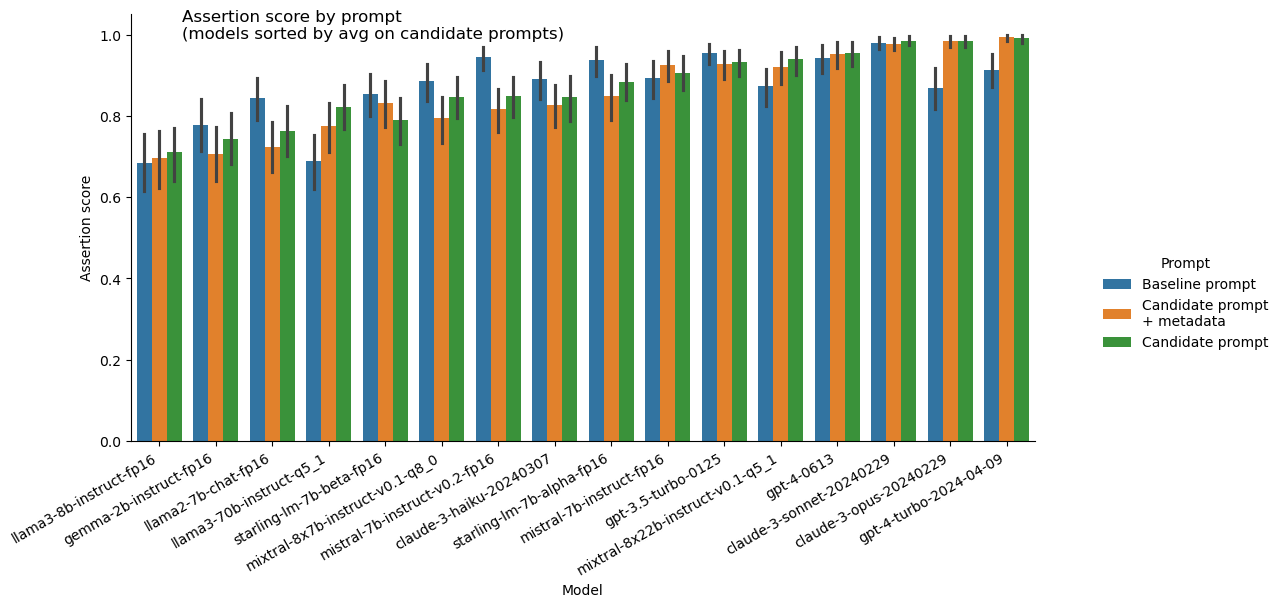

In [126]:
g = sns.catplot(
    data=df,
    x="model",
    y="comp_score",
    hue="prompt",
    hue_order=["baseline", "candidate_with_metadata", "candidate"],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.fig.suptitle(
    "Assertion score by prompt\n(models sorted by avg on candidate prompts)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion score")

g._legend.set_title("Prompt")
new_labels = ["Baseline prompt", "Candidate prompt\n+ metadata", "Candidate prompt"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

### Plot by test type + `candidate` prompt

In [127]:
# sort models by score_avg in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate",))]
    .groupby(["model", "comp_type"])["comp_score"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [128]:
sorted_models[-5:]

['claude-3-haiku-20240307',
 'gpt-4-0613',
 'claude-3-opus-20240229',
 'claude-3-sonnet-20240229',
 'gpt-4-turbo-2024-04-09']

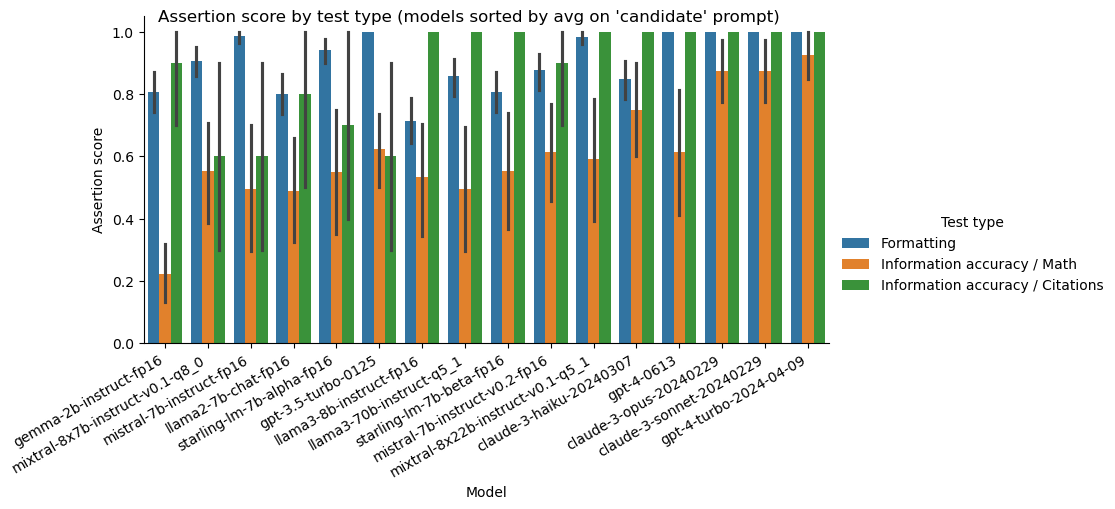

In [130]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    x="model",
    y="comp_score",
    hue="comp_type",
    hue_order=[
        "Formatting",
        "Information accuracy / Math",
        "Information accuracy / Citations",
    ],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.fig.suptitle(
    "Assertion score by test type (models sorted by avg on 'candidate' prompt)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion score")

# leg = g.axes.flat[0].get_legend()
# leg.set_title("")
g._legend.set_title("Test type")
# new_labels = [
#     "Spelling/grammar",
#     "Information accuracy",
#     "Formatting",
#     "Structure\n(C-C-C)",
# ]
# for t, l in zip(g._legend.texts, new_labels):
#     t.set_text(l)

### Plot by test type (no spelling/grammar) + `candidate` prompt

In [135]:
# sort models by score_avg in candidate prompts only (not baseline)
sorted_models = (
    df[
        df["prompt"].isin(("candidate",))
        & df["comp_type"].isin(
            (
                "Formatting",
                "Information accuracy / Math",
                "Information accuracy / Citations",
            )
        )
    ]
    .groupby(["model", "comp_type"])["comp_score"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [136]:
sorted_models[-5:]

['claude-3-haiku-20240307',
 'gpt-4-0613',
 'claude-3-opus-20240229',
 'claude-3-sonnet-20240229',
 'gpt-4-turbo-2024-04-09']

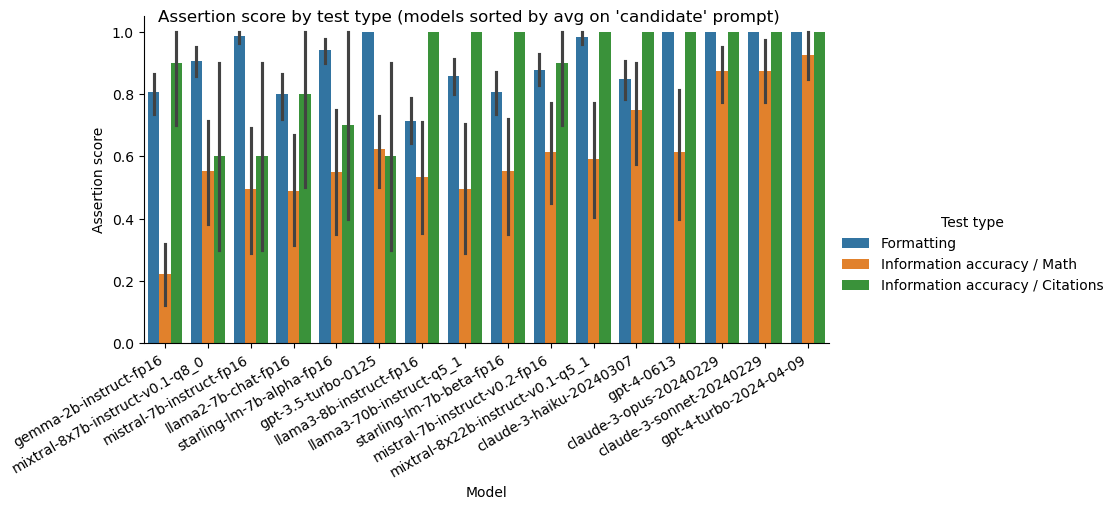

In [137]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    x="model",
    y="comp_score",
    hue="comp_type",
    hue_order=[
        "Formatting",
        "Information accuracy / Math",
        "Information accuracy / Citations",
    ],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.fig.suptitle(
    "Assertion score by test type (models sorted by avg on 'candidate' prompt)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion score")

# leg = g.axes.flat[0].get_legend()
# leg.set_title("")
g._legend.set_title("Test type")
# new_labels = [
#     # "Spelling/grammar",
#     "Formatting",
#     "Information accuracy",
#     "Structure\n(C-C-C)",
# ]
# for t, l in zip(g._legend.texts, new_labels):
#     t.set_text(l)

In [138]:
df[df["prompt"] == "candidate"].groupby(["model", "comp_type"])[
    "comp_score"
].mean().sort_values().loc[
    ["gpt-4-0613", "claude-3-opus-20240229", "gpt-4-turbo-2024-04-09"]
]

model                   comp_type                       
gpt-4-0613              Information accuracy / Math         0.6125
                        Formatting                          1.0000
                        Information accuracy / Citations    1.0000
claude-3-opus-20240229  Information accuracy / Math         0.8750
                        Formatting                          1.0000
                        Information accuracy / Citations    1.0000
gpt-4-turbo-2024-04-09  Information accuracy / Math         0.9250
                        Information accuracy / Citations    1.0000
                        Formatting                          1.0000
Name: comp_score, dtype: float64